In [1]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# loading the dataset 
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [3]:
classes = ["Zero" , "One" , "Two" , "Three" , "Four" , "Five" , "Six" , "Seven" , "Eight" , "Nine"]

In [4]:
x_train.shape

(60000, 28, 28)

Four


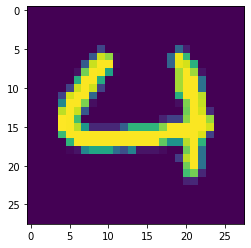

In [5]:
class_number = 60
plt.imshow(x_train[class_number])
print(classes[y_train[class_number]])

In [6]:
# normalize the data
x_train , x_test = x_train/255.0 , x_test/255.0

In [7]:
# model creation

model = Sequential()

# convolution layer 1
model.add(Conv2D(36 , 3 , activation = "relu" , kernel_initializer= "he_uniform"))
model.add(MaxPool2D())

#convolution layer 2
model.add(Conv2D(72 , 3 , activation = "relu" , kernel_initializer= "he_uniform"))
model.add(MaxPool2D())

model.add(Flatten())

# hidden layer 1
model.add(Dense(128 , input_shape=(None , 1) , activation = "relu"))
model.add(Dropout(0.4))

# hidden layer 2
model.add(Dense(64 , input_shape=(None , 1) ,activation = "sigmoid"))
model.add(Dropout(0.5))

# hidden layer 3
model.add(Dense(32 , input_shape = (None , 1) ,activation = "relu"))
model.add(Dropout(0.2))

# hidden layer 4
model.add(Dense(10 , activation = "softmax"))

In [8]:
# model compilation 

model.compile("adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [11]:
history = model.fit(tf.expand_dims(x_train , -1) , y_train , epochs = 6 , batch_size = 32, validation_data = (x_test , y_test))

Epoch 1/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0602 - accuracy: 0.9862 - val_loss: 0.0402 - val_accuracy: 0.9896
Epoch 2/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0593 - accuracy: 0.9864 - val_loss: 0.0484 - val_accuracy: 0.9885
Epoch 3/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0537 - accuracy: 0.9873 - val_loss: 0.0365 - val_accuracy: 0.9891
Epoch 4/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0474 - accuracy: 0.9888 - val_loss: 0.0514 - val_accuracy: 0.9882
Epoch 5/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0454 - accuracy: 0.9892 - val_loss: 0.0408 - val_accuracy: 0.9898
Epoch 6/6
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0430 - accuracy: 0.9902 - val_loss: 0.0454 - val_accuracy: 0.9890


In [10]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9901


[0.036662206053733826, 0.9901158213615417]

In [12]:
# Visualize train vs test
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


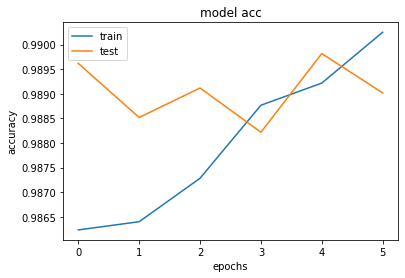

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()    

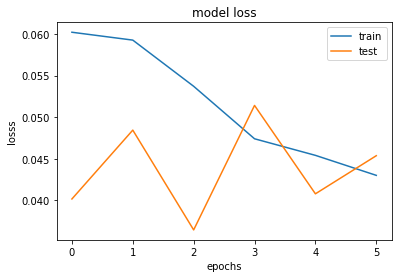

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("losss")
plt.xlabel("epochs")
plt.legend(["train" , "test"])
plt.show()